In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Laster inn energidata fra Statsbygg EOS
power = pd.read_excel('Brann og kirke.xls')
#powerHeat = pd.read_excel('Kjelkraft.xls')
# Laster inn utetemperaturer
#utetemp = pd.read_excel('table (1).xlsx')

In [5]:
power.columns = ['date', 'power', 'nn', 'nn2', 'Temp']
power = power[['date', 'power', 'Temp']]
power = power[4:]
power.date = power.date.str.slice(stop=16)
power['date'] = pd.to_datetime(power['date'], format='%d.%m.%Y %H:%M')
power['weekday'] = power.date.dt.weekday
power['month'] = power.date.dt.month
power['hour'] = power.date.dt.hour
power = power.set_index('date')

#power = powerNonHeat.merge(powerHeat.powerHeat, left_index=True, right_index=True)
#power['totPower'] = power.power  + power.powerHeat

In [6]:
power.head()

,power,Temp,weekday,month,hour
date,,,,,
2021-01-01 00:00:00,49.788002,-6.1,4,1,0
2021-01-01 01:00:00,45.187002,-6.4,4,1,1
2021-01-01 02:00:00,48.352999,-6.4,4,1,2
2021-01-01 03:00:00,47.416002,-6.7,4,1,3
2021-01-01 04:00:00,44.887999,-6.4,4,1,4


In [97]:
energyModel = {}
powerModel = {}
runTimeModel = {}

Fast minimum effektforbruk [kW] er: 


6.889999866485596

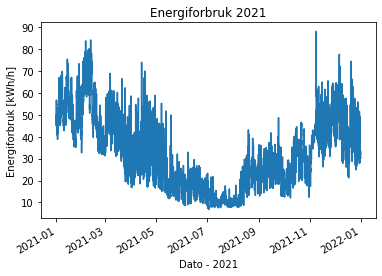

In [8]:
# Graf over energiforbruk i angitt periode
# NB! Hoppene man ser med jevnlige mellomrom i grafen under skyldes hull i tidsserien. Jobber med å finne en løsning
#power = power.set_index(['date'])
power['power'].plot()

plt.xlabel('Dato - 2021')
plt.ylabel('Energiforbruk [kWh/h]')

# Tittel
plt.title('Energiforbruk 2021')
#plt.legend()
print("Fast minimum effektforbruk [kW] er: ")
power['power'].min()

In [14]:
power['power'].sum()/200

1398.3399351921678

Text(0.5, 1.0, 'Døgnplott for 2021')

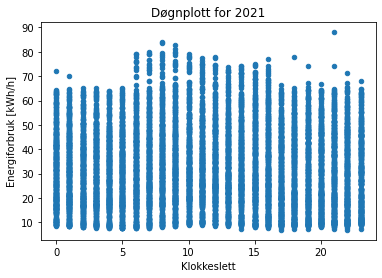

In [10]:
# Døgnplott for valgt måler
power.plot.scatter(x='hour', y='power');
plt.xlabel('Klokkeslett')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('Døgnplott for 2021')
#plt.legend()

Text(0.5, 1.0, 'Ukeplott for Malvik Rådhus')

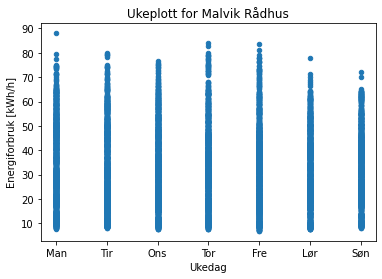

In [12]:
# Ukeplott for angitt måler
# Aktuelt for å sjekke varisjoner i drift (helg og evt. spesielle ukedager)
power.plot.scatter(x='weekday', y='power')
plt.xticks([0,1,2,3,4,5,6],['Man', 'Tir', 'Ons', 'Tor', 'Fre', 'Lør', 'Søn'])
plt.xlabel('Ukedag')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('Ukeplott for Malvik Rådhus')
#plt.legend()


Text(0.5, 1.0, 'ET-kurve natt (04:00) for Malvik Rådhus')

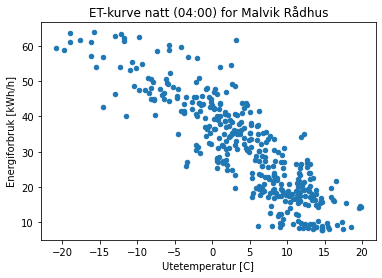

In [13]:
power[power.hour==4].plot.scatter(x='Temp', y='power')
plt.xlabel('Utetemperatur [C]')
plt.ylabel('Energiforbruk [kWh/h]')
 
# Tittel
plt.title('ET-kurve natt (04:00) for Malvik Rådhus')
#plt.legend()


In [ ]:
powerVarmeMax = 110
powerVarmeMin = 0
tempVarmeMax = 15
tempVarmeMin = -20
powerVK = 10
tempVK = 3